Let's see the simple code for Linear Regression.
We will be creating a model to predict weight of a person based on independent variable height using simple linear regression.
weight-height dataset is downloaded from kaggle
https://www.kaggle.com/sonalisingh1411/linear-regression-using-weight-height/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [3]:
%cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


1. Simple Linear Regression with one independent variable

We will read the data file and do some data exploration.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('weight-height.csv')

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.shape

(10000, 3)

In [9]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


We can see that there is high co-relation between height and weight columns.
We will use Linear Regression model from sklearn library

In [11]:
x = df['Height']
y = df['Weight']

We will split the data into train and test datasets using sklearn preprocessing library

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
X_train.shape

(8000,)

In [15]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,1)

reshape() is called to make X_train 2-dimesional that is row and column format

In [16]:
X_train.shape

(8000, 1)

In [17]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

model is created as instnace of  LinearRegression. 
With .fit() method, optimal values of coefficients (b0,b1) are calculated using existing input X_train and y_train.

In [21]:
model.score(X_train,y_train)

0.8545053200432668

The arguments to .score() are also X_train and y_train and it returns the R2 (coefficient of determination).

In [26]:
Intercept,coef = model.intercept_,model.coef_
print("Intercept is :",Intercept, sep='\n')
print("Coefficient/slope is :",coef , sep='\n')

Intercept is :
-349.7878205824451
Coefficient/slope is :
[7.70218561]


Model attributes model.intercept_, model.coef_ give the value of (b01,b1)

Now, we will use trained model to predict on test data

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

We can use also slope-intercept of line y = y-intercept + slope * x to predict the values on test data. We will use model.intercept_ and model.coef_ value for predictiion

In [28]:
y_pred1 = Intercept + coef * X_test
y_pred1

array([[179.25399046],
       [180.34848321],
       [161.62288801],
       ...,
       [129.20288223],
       [166.78470522],
       [101.81227499]])

We can see output of both y_pred and y_pred1 is same.

We will plot the graph of predicted and actual values of weights using seaborn and matplotlib library

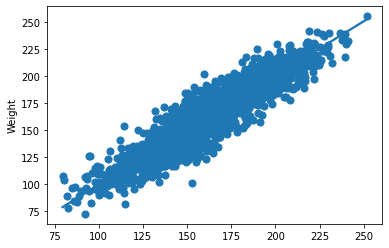

In [30]:
import seaborn as sns
ax = sns.regplot(x=y_pred, y=y_test,
                 x_estimator=np.mean)

To clearly see the the plot, let's draw 20 samples from training dataset with actual weight values and plot it with predicted weight values for training dataset.
The red dots represent the actual weight values(20 samples drawn) and the green line represents the predcted weight values by the model. The vertical distance between red dot and the green line is the error which we have to minimize to best fit the model.

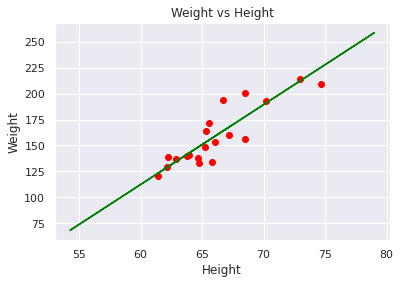

In [ ]:
plt.scatter(X_train[0:20], y_train[0:20], color = "red")
plt.plot(X_train, model.predict(X_train), color = "green")
plt.title("Weight vs Height")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

2. Multiple Linear Regressiom

A regression with 2 or more independet variables is multiple linear regression. 
We will use same dataset to implemet multiple linear regression.
The 2 independent variables will be gender and height which be used to predict the weight.

In [34]:
x = df.drop(columns = 'Weight')
y = df['Weight']

In [37]:
x.columns

Index(['Gender', 'Height'], dtype='object')

Gender column is categorical. We can not use it directly as model can work only with numbers. We have to convert it to one-hot-encoding using pandas get_dummies() method. A new column will be create dropping earlier column . The new column contain values 1 and 0 for male and female respectively.

In [46]:
x = pd.get_dummies(x, columns = ['Gender'], drop_first = True)

In [47]:
x

,Height,Gender_Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
9995,66.172652,0
9996,67.067155,0
9997,63.867992,0
9998,69.034243,0


In [52]:
print(x.shape)
print(y.shape)

(10000, 2)
(10000,)


Rest of the steps will be same as simple linear regression.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [64]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,2)

X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,2)

In [59]:
X_train.shape

(8000, 2)

In [60]:
mulLR = LinearRegression()
mulLR.fit(X_train,y_train)

LinearRegression()

In [61]:
mulLR.score(X_train,y_train)

0.9025904849221458

In [69]:
Intercept,coef = mulLR.intercept_,mulLR.coef_
print("Intercept is :",Intercept, sep='\n')
print("Coefficient/slope is :",coef , sep='\n')

Intercept is :
-244.69356793639193
Coefficient/slope is :
[ 5.97314123 19.34720343]


Coefficient array will have 2 values for gender and height respectively.

In [66]:
y_pred = mulLR.predict(X_test)
y_pred

array([165.58497097, 185.78096721, 171.25903401, ..., 126.76971077,
       175.2620878 , 105.52795239])

Alternate method : Predicting weight using coefficient and intercept values in equation

In [70]:
y_pred1 = Intercept + np.sum(coef * X_test, axis = 1)
y_pred1

array([165.58497097, 185.78096721, 171.25903401, ..., 126.76971077,
       175.2620878 , 105.52795239])

y_pred and y_pred1 both have same predicted values 

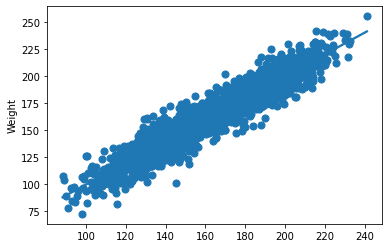

In [67]:
import seaborn as sns
ax = sns.regplot(x=y_pred, y=y_test,
                 x_estimator=np.mean)

Above plot shows graph representing predicted and actual weight values on test dataset.

3. Polynomial Regression

We will use polynomial regression to find the weight using same dataset. Note that polynomial regression is the special case of linear regression.

Import class PolynomialFeatures from sklearn.preprocessing

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
x = df['Height']
y = df['Weight']

In [77]:
transformer = PolynomialFeatures(degree = 2, include_bias = False)

We have to include terms like x2(x squared) as additional features when using polynomial regression.
We have to transform the inputfor that transformer is defined with degree (defines the degree of polynomial regression function) and include_bias decides whether to include bias or not.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [81]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,1)

X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

In [86]:
transformer.fit(X_train) 

PolynomialFeatures(include_bias=False)

In [87]:
X_trans = transformer.transform(X_train)

Above two lines of code can be fit into one line as below, both will give same output

In [88]:
x_trans = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)


In [101]:
X_transtest = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

Each value in the first column is squared and stored in second column as feature 

In [89]:
print(x_trans)

[[  61.39164365 3768.93390949]
 [  74.6976372  5579.7370037 ]
 [  68.50781491 4693.32070353]
 ...
 [  64.3254058  4137.75783102]
 [  69.07449203 4771.28544943]
 [  67.58883983 4568.25126988]]


Create and fit the model

In [91]:
poly_LR = LinearRegression().fit(x_trans,y_train)

In [92]:
poly_LR.score(x_trans,y_train)

0.8545113869072448

In [105]:
y_pred = poly_LR.predict(X_transtest)
y_pred

array([179.21164113, 180.30894754, 161.55917936, ..., 129.21768638,
       166.72257771, 102.01233209])

In [106]:
Intercept,coef = mulLR.intercept_,mulLR.coef_
print("Intercept is :",Intercept, sep='\n')
print("Coefficient/slope is :",coef , sep='\n')

Intercept is :
-244.69356793639193
Coefficient/slope is :
[ 5.97314123 19.34720343]


The score of ploynomial regression can slighly be better than linear regression due to added complexity but the high R2 scoe does not always mean good model. Sometimes ploynomial regression could lead to overfitting due to its complexity in defining the equation for regression.